In [1]:
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
def load_image(foldername):
    x=[]
    y=[]
    for classname in os.listdir(foldername): 
        
        classfolder=os.path.join(foldername,classname)
        if os.path.isdir(classfolder):  
            for imgname in os.listdir(classfolder):
                img_path=os.path.join(classfolder,imgname) 
                if img_path.lower().endswith((".png", ".jpg", ".jpeg",".JPG")): 
                    img = load_img(img_path, target_size=(128,128), color_mode='rgb')
                    img = img_to_array(img)
                    img=img.astype('float32')/255 #normalization
                    x.append(img)
                    y.append(classname)
    return np.array(x),np.array(y)

foldername="PlantVillage"
x,y=load_image(foldername)


print(x.shape,y.shape)


(20638, 128, 128, 3) (20638,)


In [3]:
encoder=LabelEncoder()
y_encoded=encoder.fit_transform(y)
unique=encoder.classes_

outputsize=len(unique)

binarizer=LabelBinarizer()
y=binarizer.fit_transform(y_encoded)

#inputsize=x.shape[1]

print(y.shape)

(20638, 15)


In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

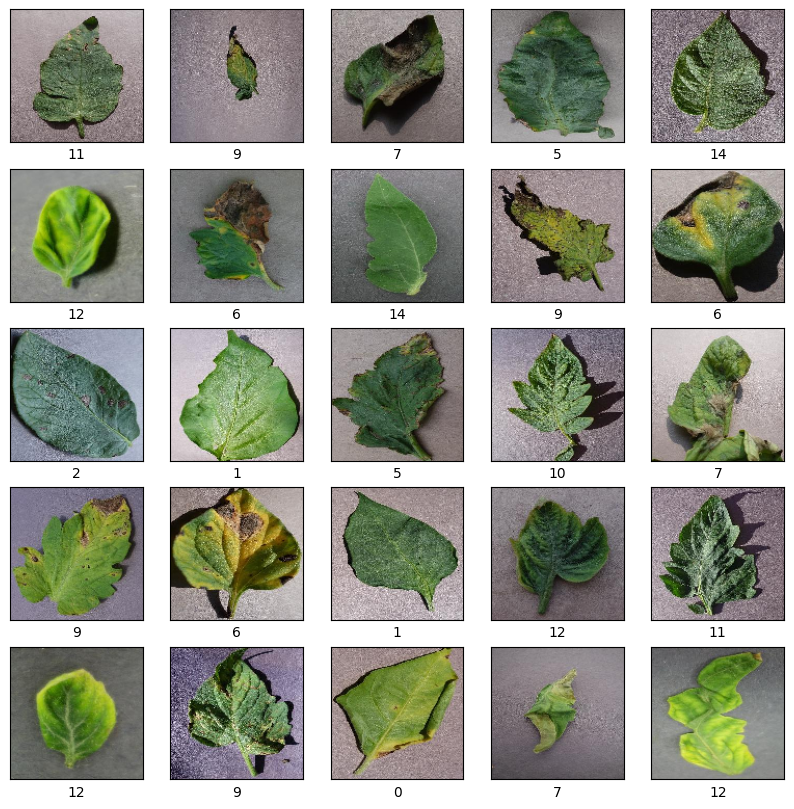

[715, 1051, 693, 694, 96, 1492, 697, 1321, 691, 1273, 1157, 947, 2254, 265, 1100]
[282, 427, 307, 306, 56, 635, 303, 588, 261, 498, 519, 457, 954, 108, 491]


In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(np.argmax(y_train[i]))
plt.show() 


count_for_each_class=[0 for i in range(outputsize)]
for i in range(len(y_train)):
    count_for_each_class[np.argmax(y_train[i])]+=1 

print(count_for_each_class)

count_for_each_class=[0 for i in range(outputsize)]
for i in range(len(y_test)):
    count_for_each_class[np.argmax(y_test[i])]+=1 

print(count_for_each_class)
   

In [29]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))



In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 860,175 (3.28 MB)

 Trainable params: 860,175 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 288s 626ms/step - accuracy: 0.3883 - loss: 1.8821 - val_accuracy: 0.7513 - val_loss: 0.7465
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 205s 454ms/step - accuracy: 0.7905 - loss: 0.6295 - val_accuracy: 0.8104 - val_loss: 0.5711
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 194s 430ms/step - accuracy: 0.8450 - loss: 0.4630 - val_accuracy: 0.8568 - val_loss: 0.4426
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 207s 457ms/step - accuracy: 0.8902 - loss: 0.3122 - val_accuracy: 0.8621 - val_loss: 0.4053
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 257s 446ms/step - accuracy: 0.9272 - loss: 0.2218 - val_accuracy: 0.8648 - val_loss: 0.4403
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 208s 460ms/step - accuracy: 0.9416 - loss: 0.1698 - val_accuracy: 0.8608 - val_loss: 0.4198
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 178s 394ms/step - accuracy: 0.9581 - loss: 0.1287 - val_accuracy: 0.8792 - val_loss: 0.4111
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 166s 366ms/step - accuracy: 0.9605 -

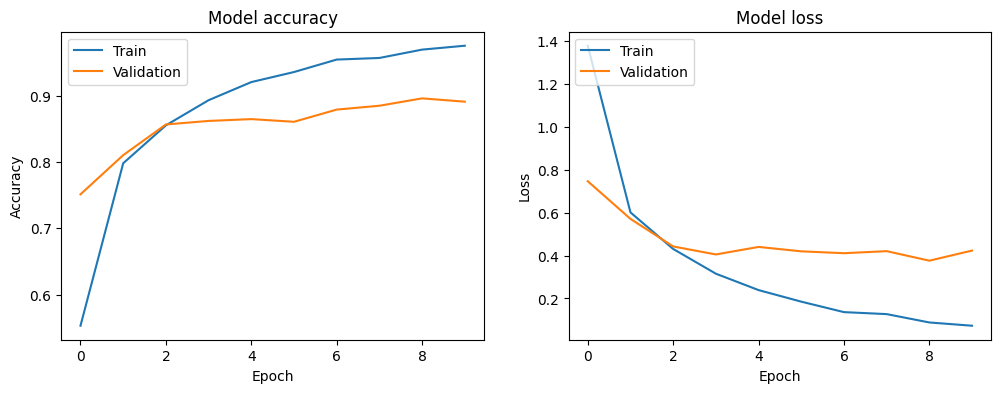

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

194/194 - 22s - 115ms/step - accuracy: 0.8911 - loss: 0.4234
0.8911498785018921
